# Customer Segmentation EDA

By Heba Masarwa

### Introduction

This exploratory data analysis investigates patterns in student behavior and engagement across different acquisition channels, drawing on onboarding survey responses, engagement metrics, and customer lifetime value data. Spanning diverse regions and marketing sources, the dataset enables us to examine how students interact with the platform based on how they first heard about it. The analysis focuses on identifying trends in study habits, marketing effectiveness, and user segmentation in preparation for a clustering model that will help uncover meaningful student groups and inform targeted marketing strategies.

### EDA

In [202]:
# Importing The Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
# Importing The Data
try:
    df = pd.read_csv('customer_segmentation_data.csv')
except:
    print('Error while loading the file')

In [204]:
data = df.copy()

In [205]:
data.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


- **Minutes Watched:** The number of minutes a student has watched since joining the program.
- **CLV:** The Customer Lifetime Value, or CLV, shows the total amount of revenue generated by that customer.
- **Region:** This is the geographical region where the student comes from.
- **Channel:** This is the channel through which the customer has learned about the 365 program

**The label mapping:**

Region:

- 0 → USA, Canada, United Kingdom, Australia

- 1 → Western Europe

- 2 → Rest of the World

Channel:

- 1 → Google

- 2 → Facebook

- 3 → YouTube

- 4 → LinkedIn

- 5 → Twitter

- 6 → Instagram

- 7 → Friend

- 8 → Other

In [206]:
data.tail()

,minutes_watched,CLV,region,channel
3829,11.0,79.0,0,3
3830,28.0,79.0,0,2
3831,57.0,36.0,2,2
3832,44.0,36.0,2,1
3833,NaN,79.0,0,3


In [207]:
data.shape

(3834, 4)

In [208]:
data.columns

Index(['minutes_watched', 'CLV', 'region', 'channel'], dtype='object')

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [210]:
data.stb.missing(style=True)

,missing,total,percent
minutes_watched,109,"3,834",2.84%
CLV,0,"3,834",0.00%
region,0,"3,834",0.00%
channel,0,"3,834",0.00%


In [211]:
data.describe()

,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


#### Data Cleaning

Visualizing the Missing Values

<Axes: >

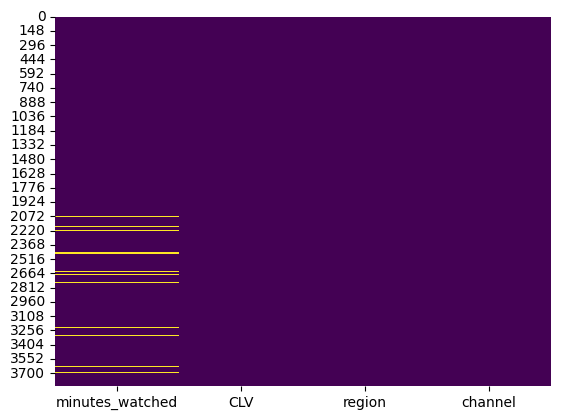

In [212]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')


These null values are for people who have purchased the program but have not seen any video content. We’ll fill those empty values with zeroes for our analysis instead of excluding them.

In [213]:
data = data.fillna(0)

### Visualizations


#### How does the Customer Lifetime Value affect minutes watched? 

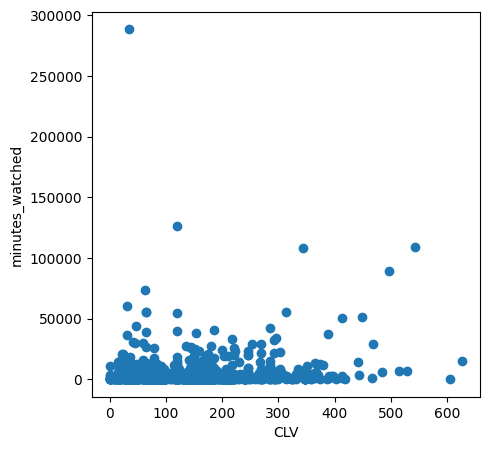

In [214]:
plt.figure(figsize=(5,5))
plt.scatter(x='CLV',y='minutes_watched',data=data)
plt.xlabel('CLV')
plt.ylabel('minutes_watched')
plt.ticklabel_format(style='plain', axis='y')

We observe a slight linear relationship between minutes watched and CLV, but overall, the correlation doesn’t appear strong. To confirm, we will calculate their correlation coefficient.


In [215]:
correlation = data['minutes_watched'].corr(data['CLV'])
print("Correlation between minutes_watched and CLV:", round(correlation,2))

Correlation between minutes_watched and CLV: 0.11


The correlation coefficient between minutes watched and CLV is approximately 0.11, indicating a very weak positive linear relationship. This suggests that the amount of time students spend watching does not strongly predict their customer lifetime value.

#### Distribution for Region and Channel

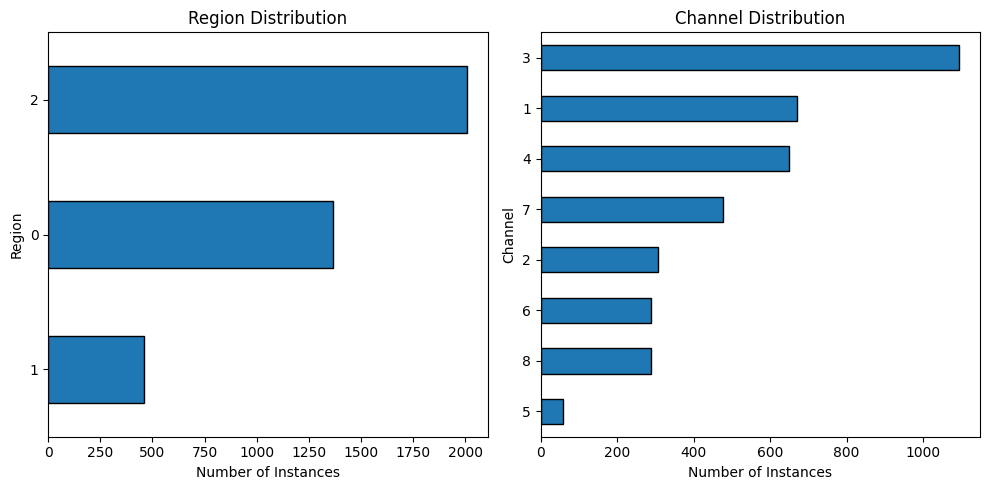

In [216]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

region_counts = data['region'].value_counts().sort_values(ascending=True)
region_counts.plot(kind='barh', edgecolor='black', ax=ax[0])
ax[0].set_title('Region Distribution')
ax[0].set_ylabel('Region')
ax[0].set_xlabel('Number of Instances')

channel_counts = data['channel'].value_counts().sort_values(ascending=True)
channel_counts.plot(kind='barh', edgecolor='black', ax=ax[1])
ax[1].set_title('Channel Distribution')
ax[1].set_ylabel('Channel')
ax[1].set_xlabel('Number of Instances')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

For the **Region distribution**, category 2 (Rest of the World) has the highest number of instances. It is followed by category 0 (USA, Canada, United Kingdom, Australia), and category 1 (Western Europe) has the lowest count.

For the **Channel distribution**, channel 3 (YouTube) leads by a large margin. It is followed by channel 1 (Google) and channel 4 (LinkedIn). Next are channels 7 (Friend), 2 (Facebook), 8 (Other), and 6 (Instagram), which all have similar counts. Channel 5 (Twitter) has the fewest instances.

#### Total Minutes Watched and Total CLV by Region

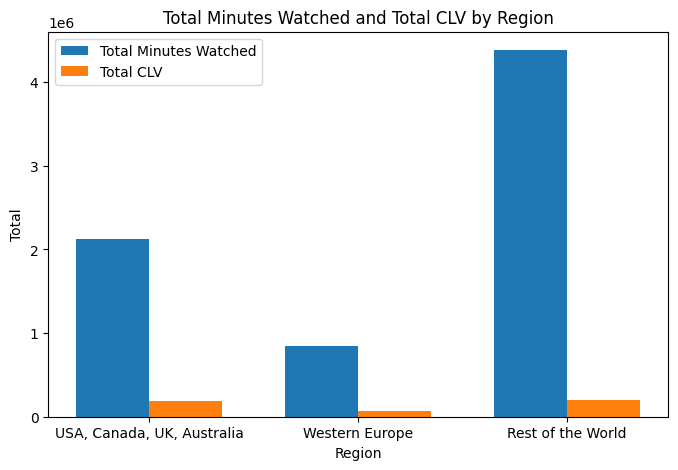

In [217]:
agg_data = data.groupby('region')[['minutes_watched', 'CLV']].sum()

x = np.arange(len(agg_data))  # positions for regions
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8,5))

bars1 = ax.bar(x - width/2, agg_data['minutes_watched'], width, label='Total Minutes Watched')
bars2 = ax.bar(x + width/2, agg_data['CLV'], width, label='Total CLV')

ax.set_xlabel('Region')
ax.set_ylabel('Total')
ax.set_title('Total Minutes Watched and Total CLV by Region')
ax.set_xticks(x)
ax.set_xticklabels(['USA, Canada, UK, Australia', 'Western Europe', 'Rest of the World'])
ax.legend()

plt.show()

The Rest of the World region has the highest total minutes watched compared to the other regions, while its CLV is similar to that of the USA, Canada, UK, and Australia region. Meanwhile, the Western Europe region has the lowest total minutes watched and CLV, which is unsurprising given it has the fewest users.

#### Total Minutes Watched and Total CLV by Channel

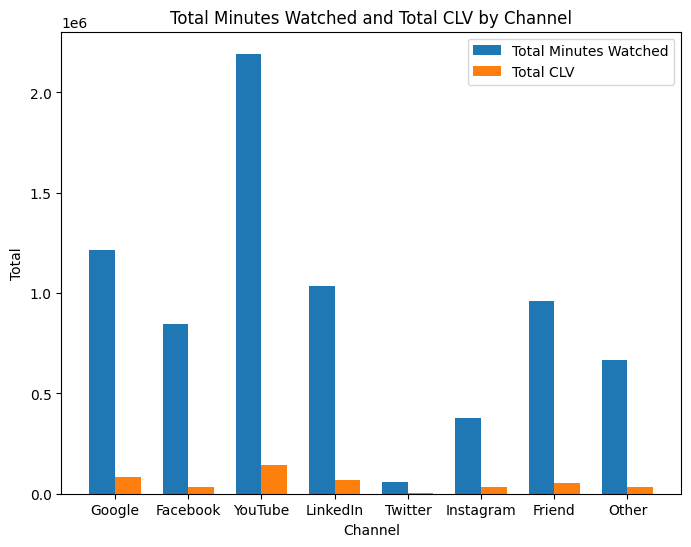

In [218]:
agg_data = data.groupby('channel')[['minutes_watched', 'CLV']].sum()

x = np.arange(len(agg_data)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(8,6))

bars1 = ax.bar(x - width/2, agg_data['minutes_watched'], width, label='Total Minutes Watched')
bars2 = ax.bar(x + width/2, agg_data['CLV'], width, label='Total CLV')

ax.set_xlabel('Channel')
ax.set_ylabel('Total')
ax.set_title('Total Minutes Watched and Total CLV by Channel')
ax.set_xticks(x)
ax.set_xticklabels(['Google', 'Facebook', 'YouTube', 'LinkedIn', 'Twitter','Instagram','Friend' ,'Other'])
ax.legend()

plt.show()

YouTube is again ahead of all other channels, which is expected since it provided the largest number of users. Google, LinkedIn, Friend, and Facebook follow in that order. Other and Instagram fall slightly behind these, while Twitter has the lowest values across all channels.

### Create Dummy Variables

In this section we will prepare the data before the next step of model implementation.

In [219]:
# Extract the 'channel' column (may contain multiple selections per row)
df_heard_from = data['channel'] 

# Extract the 'region' column
df_countries = data['region'] 

# If 'channel' contains lists or multiple values, this expands them into separate rows,
# then creates dummy variables for each channel value.
df_dummies = pd.get_dummies(data['channel'].apply(pd.Series).stack())

# Sum the dummy variables back to the original row level (groupby level=0)
# so each row has a 1/0 indicator if that channel was present.
df_dummies = df_dummies.groupby(level=0).sum()

# Create one-hot encoded dummy variables from the original 'channel' column.
# This assumes a single value per row. The prefix 'channel_' will label these columns.
segment_dummies = pd.get_dummies(df_heard_from, prefix='channel', prefix_sep='_')

# Concatenate the original data and the channel dummy variables side by side
df_segmentation = pd.concat([data, segment_dummies], axis=1)

# Create one-hot encoded dummy variables for the 'region' column, with prefix 'country_region_'
segment_dummies_2 = pd.get_dummies(df_countries, prefix='country_region', prefix_sep='_')

# Append the region dummy variables to the dataframe
df_segmentation = pd.concat([df_segmentation, segment_dummies_2], axis=1)

# Drop the original 'channel' column since we have replaced it with dummy variables
df_segmentation = df_segmentation.drop(["channel"], axis=1)

# View the first few rows to check the result
df_segmentation.head()


,minutes_watched,CLV,region,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,country_region_0,country_region_1,country_region_2
0,3197.0,205.42,2,False,False,False,True,False,False,False,False,False,False,True
1,63.0,149.99,0,True,False,False,False,False,False,False,False,True,False,False
2,605.0,119.00,2,False,True,False,False,False,False,False,False,False,False,True
3,20.0,240.00,2,False,False,False,True,False,False,False,False,False,False,True
4,245.0,184.36,1,False,False,False,True,False,False,False,False,False,True,False


We will now export the cleaned and preprocessed dataset and proceed with the model implementation in a separate file to maintain a clear and organized workflow.

In [220]:
df_segmentation.to_csv('cleaned_segmentation_data.csv', index=False)